In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("height_gender_data.csv")


In [3]:
df.head()

,Unnamed: 0,height,gender
0,0,142.905550,Male
1,1,115.598717,Male
2,2,138.027187,Female
3,3,130.939245,Male
4,4,125.079458,Female


In [4]:
df.shape

(10000, 3)

In [5]:
df.columns

Index(['Unnamed: 0', 'height', 'gender'], dtype='object')

In [6]:
df.pop('Unnamed: 0')

0          0
1          1
2          2
3          3
4          4
        ... 
9995    9995
9996    9996
9997    9997
9998    9998
9999    9999
Name: Unnamed: 0, Length: 10000, dtype: int64

In [7]:
df.columns

Index(['height', 'gender'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  10000 non-null  float64
 1   gender  10000 non-null  object 
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
discrete_df = df.select_dtypes(include = ['object'])

In [12]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*5,col_name,"*"*5)
        print(discrete_data[col_name].agg(['count','nunique','unique']))
        print("Value Counts:n",discrete_data[col_name].value_counts())
        print()

In [13]:
discrete_univariate_analysis(discrete_df)

***** gender *****
count               10000
nunique                 2
unique     [Male, Female]
Name: gender, dtype: object
Value Counts:n Male      7114
Female    2886
Name: gender, dtype: int64



In [14]:
numerical_df = df.select_dtypes(include=['float64'])

In [17]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*5,col_name,"*"*5)
        print(numerical_data[col_name].agg(['min','max','mean','median','std']))
        print()

In [18]:
numerical_univariate_analysis(numerical_df)

***** height *****
min        85.569854
max       195.971730
mean      145.047252
median    145.093890
std        14.860747
Name: height, dtype: float64



In [19]:
grouped_df=df.groupby('gender')

In [22]:
grouped_df.nunique()

,height
gender,
Female,2886
Male,7114


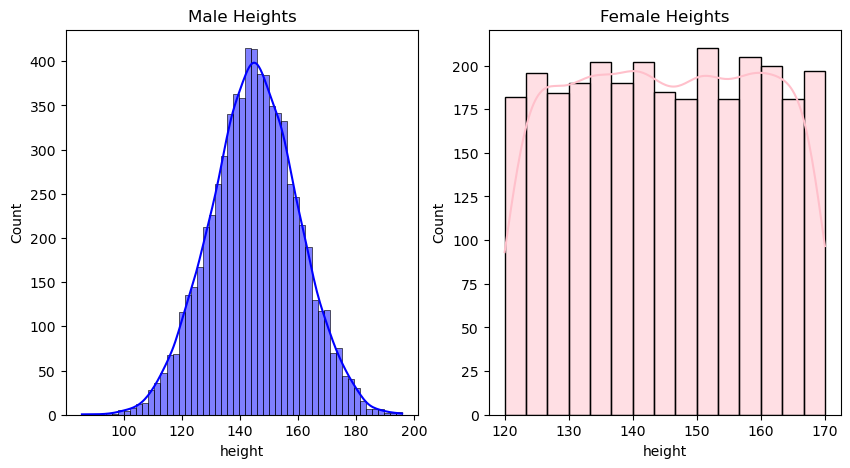

In [29]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the Male heights
sns.histplot(data=df[df["gender"] == "Male"], x="height", ax=ax1, kde=True, color="blue")
ax1.set_title("Male Heights")

# Female heights
sns.histplot(data=df[df["gender"] == "Female"], x="height", ax=ax2, kde=True, color="pink")
ax2.set_title("Female Heights")

plt.show()
